<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Programming_10_Interfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bowling for Interfaces
### Programming and Problem Solving | Brendan Shea, PhD

In Object-Oriented Programming (OOP), we use classes to encapsulate data and behavior into reusable components. Classes define the properties (attributes) and methods (behaviors) of objects, and we can create instances of these classes to represent specific entities in our program.

Java supports several fundamental concepts of OOP, including:

1.  **Encapsulation.** Bundling data and methods into a single unit (class) and controlling access to the internal state of an object.
2.  **Inheritance.** Creating new classes based on existing classes, allowing for code reuse and hierarchical relationships between classes.
3.  **Polymorphism.** Treating objects of different classes as objects of a common superclass, enabling more flexible and modular code.
4.  **Abstraction** Focusing on the essential features of an object and hiding unnecessary details, providing a simplified and generalized view of the system.

These concepts help us create well-structured, maintainable, and extensible code. However, there are situations where we need to define a set of methods that are common to different classes, but these classes don't necessarily share a common superclass. This is where interfaces come into play. These are the subject of this chapter.

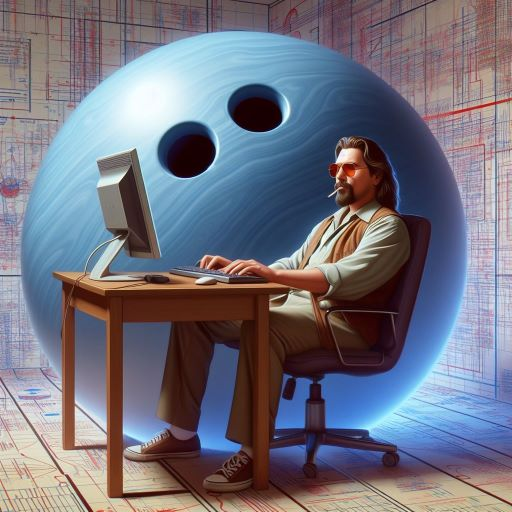

### BrendyBot is Here to Answer Your Questions
If you have questions about the content of this chapter, you can try out "BrendyBot", an AI chat bot I've trained on the lecture notes for this class (note that BrendyBot is stil experimental, and can definitley make mistakes!).

https://poe.com/BrendyBot


### A Class Can Implement Multiple Interfaces
You might notice that interfaces are a bit like abstract classes. However, in Java, a class can only have ONE abstract class as its "parent." By contrast, a class can implement mutiple interfaces, so long as it follows the "rules" for each of them. To further illustrate this, let's consider another example, this time related to the "Playable" interface.

```java
public interface Playable {
    void play();
    void pause();
}

public class BowlingGame implements Resetable, Playable {
    // Implementations of reset(), play(), and pause() methods
}

public class GameManager {
    private Playable game;

    public void setGame(Playable game) {
        this.game = game;
    }

    public void startGame() {
        game.play();
    }

    public void pauseGame() {
        game.pause();
    }
}
```

## Sample Code
To get started, let's show how to fully implement resetable in the context of one class (

In [ ]:
%%writefile Resetable.java

public  interface  Resetable  {
  void  reset();
}

Writing Resetable.java


In [ ]:
!javac Resetable.java

Now, let's implement a `SimpleBowler` class (later, we'll be implementing a slightly more complex version):

In [ ]:
%%writefile SimpleBowler.java

public class SimpleBowler implements Resetable {
    private String name;
    private int score;

    public SimpleBowler(String name) {
        this.name = name;
        this.score = 0;
    }

    public String getName() {
        return name;
    }

    public int getScore() {
        return score;
    }

    public void setScore(int score) {
        this.score = score;
    }

    public void bowlFrame(int pinsKnocked) {
        score += pinsKnocked;
        System.out.println(name + " bowled a frame and knocked down " + pinsKnocked + " pins.");
    }

    @Override
    public void reset() {
        score = 0;
        System.out.println(name + "'s score has been reset to " + score);
    }
}

Writing SimpleBowler.java


In [ ]:
!javac SimpleBowler.java

In this implementation, the `Bowler` class has a constructor that takes the bowler's name, and it initializes the score to 0. It also provides methods to get and set the score, as well as a `bowlFrame()` method to simulate bowling a frame and updating the score.

The `reset()` method is implemented as required by the `Resetable` interface. It sets the score back to 0 and prints a message indicating that the bowler's score has been reset.

Now, let's create a `BowlerTest` class to demonstrate the usage of the `Bowler` class and the `reset()` method:

In [ ]:
%%writefile SimpleBowlerTest.java
public class SimpleBowlerTest {
    public static void main(String[] args) {
        SimpleBowler theDude = new SimpleBowler("The Dude");
        SimpleBowler walterSobchak = new SimpleBowler("Walter Sobchak");
        SimpleBowler donnyKerabatsos = new SimpleBowler("Donny Kerabatsos");

        theDude.bowlFrame(7);
        walterSobchak.bowlFrame(10);
        donnyKerabatsos.bowlFrame(6);

        System.out.println("Scores before reset:");
        System.out.println(theDude.getName() + ": " + theDude.getScore());
        System.out.println(walterSobchak.getName() + ": " + walterSobchak.getScore());
        System.out.println(donnyKerabatsos.getName() + ": " + donnyKerabatsos.getScore());

        System.out.println("\nResetting scores...");
        theDude.reset();
        walterSobchak.reset();
        donnyKerabatsos.reset();

        System.out.println("\nScores after reset:");
        System.out.println(theDude.getName() + ": " + theDude.getScore());
        System.out.println(walterSobchak.getName() + ": " + walterSobchak.getScore());
        System.out.println(donnyKerabatsos.getName() + ": " + donnyKerabatsos.getScore());
    }
}

Writing SimpleBowlerTest.java


In [ ]:
!javac SimpleBowlerTest.java

In [ ]:
!java SimpleBowlerTest

The Dude bowled a frame and knocked down 7 pins.
Walter Sobchak bowled a frame and knocked down 10 pins.
Donny Kerabatsos bowled a frame and knocked down 6 pins.
Scores before reset:
The Dude: 7
Walter Sobchak: 10
Donny Kerabatsos: 6

Resetting scores...
The Dude's score has been reset to 0
Walter Sobchak's score has been reset to 0
Donny Kerabatsos's score has been reset to 0

Scores after reset:
The Dude: 0
Walter Sobchak: 0
Donny Kerabatsos: 0


### Exercise: Bowling Alley Lane
 Implement a `Lane` class that represents a bowling alley lane. The lane should have attributes and methods to manage its state and behavior.

1.  The `Lane` class should implement the `Resetable` interface, which defines the `reset()` method.
2.  Implement the following attributes in the `Lane` class:
    -   `number` (int): The lane number.
    -   `isOccupied` (boolean): Indicates whether the lane is currently occupied by a bowler.
    -   `bowler` (String): The name of the bowler currently occupying the lane (optional).
3.  Implement a constructor for the `Lane` class that takes the lane number as a parameter and initializes the lane attributes appropriately.
4.  Implement the following methods in the `Lane` class:
    -   `getNumber()`: Returns the lane number.
    -   `isOccupied()`: Returns the current occupancy status of the lane.
    -   `getBowler()`: Returns the bowler currently occupying the lane (if any).
    -   `assignBowler(Bowler bowler)`: Assigns a bowler to the lane and sets the occupancy status to true.
    -   `releaseBowler()`: Removes the bowler from the lane and sets the occupancy status to false.
    -   `reset()`: Resets the lane by releasing the bowler and setting the occupancy status to false.
5.  Test your implementation by creating instances of the `Lane` class in `LaneTest` class, assigning bowlers, and resetting the lanes.



In [ ]:
%%writefile Lane.java
public  class  Lane  implements  Resetable  {
  // ...
  @Override   public  void  reset()  {
    isOccupied =  false;   }
    }

In [ ]:
!javac Resetable.java
!javac Lane.java

In [ ]:
%%writefile LaneTest.java
public class LaneTest{



}

In [ ]:
!javac LaneTest.java

In [ ]:
!java LaneTest

## Case Study: Software Engineering

Picture this: you're the manager of a beloved bowling alley frequented by the likes of The Dude, Walter Sobchak, and their eccentric friends. The alley has been using a manual scoring system, but as business picks up, you realize it's time to modernize and streamline operations.

Enter the nihilists - a group of talented programmers who promise to build a cutting-edge bowling score tracking system. However, their lack of software engineering expertise quickly becomes apparent as the project spirals out of control. The requirements are vague, the design is chaotic, and the code is as convoluted as the plot of a Coen brothers' movie.

Frustrated and desperate, you decide to take matters into your own hands and embark on a journey to develop a reliable and efficient bowling score tracking program. To ensure success, you turn to the software development lifecycle (SDLC) - a structured approach that will guide you through the process of building high-quality software.

The SDLC consists of several key stages, each playing a crucial role in the development of your bowling score tracking program:

1.  **Requirements Gathering.** This stage is all about understanding what your bowling alley needs. You'll interview stakeholders (like The Dude and Walter), observe current processes, and document the features and functionalities the program must have, such as tracking scores, managing lanes and bowlers, and generating reports. Think of this stage as gathering intel for a big heist - the more detailed and accurate your requirements, the smoother the rest of the project will go.
2.  **Design.** With the requirements in hand, it's time to put on your architect hat and plan the structure of your program. You'll use object-oriented design principles to create a modular and extensible architecture, defining classes for lanes, bowlers, and scores, and interfaces for common behavior. You'll also sketch out the user interface, ensuring it's as cool and intuitive as a White Russian. This stage is like drawing up blueprints for your software masterpiece.
3.  **Implementation.** Now, the real fun begins! You'll channel your inner programmer and start writing code, bringing your design to life. This is where you'll leverage object-oriented programming concepts, like encapsulation and inheritance, to create clean, maintainable, and efficient code. You'll also make sure to follow best practices, like using proper naming conventions and commenting your code, so that future maintainers (or your future self) can easily understand what's going on.
4.  **Testing.** Before you unleash your program on the unsuspecting bowlers, you need to make sure it's as solid as a 7-10 split. This is where testing comes in - you'll write unit tests, perform integration testing, and conduct user acceptance testing to ensure the program meets all the requirements and works flawlessly. You'll also use debugging techniques to identify and fix any issues that crop up, like bugs in the score calculation or glitches in the user interface.
5.  **Deployment.** Once your program is tested and ready, it's time to deploy it to the bowling alley's computer system. This stage involves packaging the program, configuring the environment, and providing clear installation instructions. You'll also train the staff on how to use the new system, making sure they're as comfortable with it as The Dude is with his bowling shoes.
6.  **Maintenance.** Your work doesn't end once the program is deployed. You'll need to provide ongoing support and maintenance, fixing any bugs that arise, updating the software to keep up with changing requirements, and enhancing the program based on user feedback. This stage is like being the guardian angel of your software, always watching over it and making sure it stays in top form.

By following the SDLC and applying its stages to the development of your bowling score tracking program, you'll avoid the chaos and confusion that plagued the nihilists' project. Instead, you'll create a robust, reliable, and user-friendly system that will keep your bowlers happy and your alley running smoothly. So, take a deep breath, grab your bowling ball, and let's embark on this software development adventure together!

### Requirements Gathering
Requirements gathering is a critical stage in the software development lifecycle where the team aims to identify and document the key requirements for the project. In the context of our bowling alley score tracking program, this involves understanding the needs and expectations of the various stakeholders, such as the alley owner, staff, and bowlers.

To gather requirements effectively, we can employ several techniques:

1.  Conducting **interviews** with stakeholders allows us to have in-depth conversations about their needs, preferences, and pain points. By asking questions like "What features would enhance your bowling experience?" or "How can we improve score tracking accuracy and efficiency?", we can gain valuable insights into their requirements.
2.  **Surveys** are a useful tool for gathering feedback from a larger group of users. We can create questionnaires that focus on specific aspects of the bowling experience, such as lane management, league play, and player statistics. This helps us collect comprehensive and representative requirements from a diverse range of users.
3. **User stories** are a way to capture requirements from the user's perspective. They follow a simple format: "As a [type of user], I want [some goal] so that [some reason]." For example, "As a league bowler, I want to view my average score over the past month so that I can track my progress and identify areas for improvement." User stories help us understand the user's needs in a concise and relatable manner.

Once the requirements are gathered, it's essential to document them clearly and thoroughly. Requirements documentation should include details such as the purpose, priority, and acceptance criteria for each requirement. Using diagrams, flowcharts, and mockups can help visualize complex processes and user interfaces. It's also crucial to keep the documentation updated throughout the project lifecycle as requirements may evolve and change.

#### Example: Requirements
At the end of the day, let's suppose we have a long list of requirements, which include the following:

1.  The system shall accurately calculate and display the score for each frame bowled by a player.
2.  The system shall support tracking scores for up to 10 frames per game, following the standard bowling scoring rules.
3.  The system shall allow players to input the number of pins knocked down for each throw in a frame.
4.  The system shall automatically calculate and display the total score for each player at the end of the game.
5.  The system shall handle spare and strike calculations correctly, adhering to the bowling scoring guidelines.
6.  The system shall display an error message if the number of pins knocked down in a single throw exceeds 10.
7.  The system shall provide an option to correct or modify scores for a specific frame during the game.

In writing these requirements, we try to do the following:

1.  Each requirement is stated in a clear and specific manner, leaving no room for ambiguity. For example, "The system shall accurately calculate and display the score for each frame bowled by a player" clearly states what the system needs to do and what is expected of it.
2. The requirements are phrased in a way that makes them measurable and testable (or "falsiable"). For instance, "The system shall support tracking scores for up to 10 frames per game, following the standard bowling scoring rules" can be easily verified by testing the system with different game scenarios and checking if the scores are tracked correctly for 10 frames.
3.  The requirements are realistic and achievable within the scope of the project. They focus on the core functionalities needed for score tracking without introducing unnecessary complexity.

By phrasing the requirements as clear, complete, and falsifiable statements, we ensure that the development team has a solid understanding of what needs to be built. It helps in avoiding ambiguity, reducing misinterpretations, and providing a basis for testing and validation.

Moreover, well-defined requirements act as a contract between the stakeholders and the development team. They set clear expectations and provide a reference point for evaluating the success of the project. By having a comprehensive set of requirements, the team can prioritize their work, make informed decisions, and deliver a system that meets the needs of the users.

### The Design Phase
Designing the architecture and user interface of our bowling score tracking program is a crucial step in ensuring its modularity, extensibility, and user-friendliness. Before diving into the actual coding, it's important to review the principles of object-oriented design (OOD) and how they can be applied to our program's architecture.

OOD is a programming paradigm that organizes software design around objects, which are instances of classes. Let's revisit the main principles of OOD:

1.  **Classes** are the blueprints for creating objects. They define the attributes (data) and methods (behavior) that objects of that class will possess. In our bowling score tracking program, we have identified several key classes, such as `Person`, `Bowler`, `Staff`, `Lane`, `Game`, and `Score`.
2.  **Encapsulation** is the practice of bundling data and methods within a class and controlling access to them. By encapsulating the internal details of an object and providing a public interface, we ensure that the program is modular and maintainable. For example, the `Bowler` class encapsulates the bowler's name, age, and average score, while providing methods to update and retrieve these values.
3.  **Inheritance** allows classes to inherit attributes and methods from other classes, promoting code reuse and hierarchical relationships. In our program, we have created an abstract base class called `Person` with common attributes like name and age. The `Bowler` and `Staff` classes inherit from `Person`, inheriting its attributes and methods.
4.  **Polymorphism.** Polymorphism enables objects of different classes to be treated as objects of a common parent class or interface. It allows for flexibility and extensibility in the program's design. For instance, we have defined the `Resetable` interface, which declares the `reset()` method. The `Bowler`, `Lane`, and `Game` classes implement this interface, allowing them to be reset to their initial state polymorphically.

Here are some key points to consider during the design phase:

1.   Create a class diagram that illustrates the classes in our program, their attributes, methods, and relationships. The class diagram helps in visualizing the overall structure of the program and how the classes interact with each other.
2.  Identify and define abstract classes and interfaces that specify common behavior across multiple classes. In our program, we have defined the `Resetable` interface, which declares the `reset()` method. Similarly, we have made the `Person` class an abstract class, providing a base for the `Bowler` and `Staff` classes. Abstract classes allow for code reuse and provide a foundation for inheritance.
3.  Create mockups or wireframes of the user interface to visualize how the program will look and feel. Consider incorporating the Big Lebowski theme into the design, using elements like bowling pins, lanes, and characters from the movie. The UI should be intuitive, visually appealing, and provide a seamless user experience. (Here, we're not going to do this!).

By focusing on the design phase and utilizing tools like UML diagrams and UI mockups, we can create a clear blueprint for our program before starting the actual coding. This approach ensures that we have a solid foundation and a well-thought-out architecture that adheres to the principles of OOD.

### Graphic: Sample UML Diagram
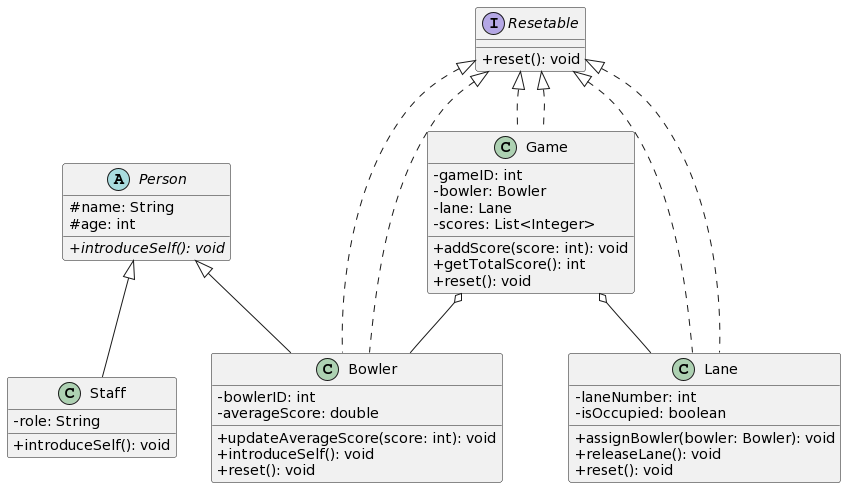

#### How to Interpret UML Diagrams
1. Each box in the diagram represents a **class** (e.g., Person, Staff, Bowler, Game, Lane).
2. The class name is written at the top of each box.
3. An **abstract class** is denoted by italicized text (e.g., Person).Abstract classes cannot be instantiated and are intended to be subclassed.
4. **Inheritance** is represented by a solid line with a hollow arrowhead pointing from the subclass to the superclass. In this diagram, Staff and Bowler inherit from the abstract class Person.
5. An **interface** is represented by a box with the «interface» stereotype (e.g., Resetable). Interfaces define a contract that classes can implement.
6. Realization is represented by a dashed line with a hollow arrowhead pointing from the implementing class to the interface.  In this diagram, Bowler, Game, and Lane classes implement the Resetable interface.
7. **Attributes** are listed inside the class boxes, below the class name.
8. The **visibility** of attributes is denoted by symbols: + (public), - (private), # (protected).
9. Attribute names are followed by their type (e.g., name: String, age: int).
10. **Methods** are listed inside the class boxes, below the attributes. Method names are followed by parentheses () and their return type (e.g., introduceSelf(): void).  Abstract methods are italicized (e.g., introduceSelf(): void in the Person class).
11. **Associations** represent relationships between classes.  In this diagram, there is an association between the Game class and the Bowler and Lane classes (represented by a solid lane).

### SDLC Quiz
Run the following cell to launch a quiz on the SDLC.

In [ ]:
!wget https://github.com/brendanpshea/colab-utilities/raw/main/sdlc_quiz.py -q -nc
from sdlc_quiz import sdlc_quiz
sdlc_quiz()

Welcome to the Software Development Lifecycle Quiz!
For each activity, enter the corresponding stage:
Planning, Analysis, Design, Implementation, Testing, or Maintenance

Type 'quit' to exit the game.


Statement: Preparing test plans and test cases.
Your answer: testing
Correct!


Statement: Performing user acceptance testing (UAT) with end-users.
Your answer: quit
Game exited early. Your final score: 1/10


### Implementation
When implementing our bowling score tracking program, it's crucial to consider key aspects that contribute to writing clean, maintainable, and efficient code. Let's focus on the implementation of a `BowlerRevised` class and its dependencies, while highlighting the importance of coding best practices and demonstrating how to leverage object-oriented programming concepts.

First, we'll implement the `Person` abstract class and the `Resetable` interface, which the (revised) `Bowler` class depends on. Then, we'll implement the rest of the Bowler clss.

In [ ]:
%%writefile Bowler.java


// Person

abstract class Person {
    protected String name;
    protected int age;

    public Person(String name, int age) {
        this.name = name;
        this.age = age;
    }
    public abstract void introduceSelf();

    public String getName(){
        return name;
    }

    public int getAge(){
      return age;
    }
}


// Resetable

interface Resetable {
    void reset();
}


// Bowler
class Bowler extends Person implements Resetable {
    private static int nextBowlerID = 1;
    private int bowlerID;
    private double averageScore;

    public Bowler(String name, int age) {
        super(name, age);
        this.bowlerID = nextBowlerID++;
        this.averageScore = 0.0;
    }



    public int getBowlerID() {
        return bowlerID;
    }

    public double getAverageScore() {
        return averageScore;
    }

    public void updateAverageScore(int score) {
        // TODO: Implement logic to update the average score based on the new score
    }

    @Override
    public void introduceSelf() {
        System.out.println("Hello, my name is " + name + ", and I'm a bowler!");
    }

    @Override
    public void reset() {
        averageScore = 0.0;
    }
}

Writing Bowler.java


In [ ]:
!javac Bowler.java

Let's break down the implementation:

1.  The `BowlerRevised` class extends the `Person` abstract class and implements the `Resetable` interface, indicating that it inherits the properties and methods of `Person` and must provide an implementation for the `reset()` method.
2.  We introduce a **static variable** `nextBowlerID` to assign unique IDs to each bowler. This variable is incremented every time a new bowler is created. (So, this variable belongs to class Bowler, than to any individual bowler).
3.  The `BowlerRevised` class has additional attributes: `bowlerID` (unique identifier) and `averageScore` (average bowling score).
4.  The constructor takes the bowler's name and age and calls the `super` constructor to initialize the inherited properties. It assigns a unique `bowlerID` using `nextBowlerID` and initializes `averageScore` to 0.0.
5.  Getter methods (`getBowlerID()` and `getAverageScore()`) are provided to access the bowler's ID and average score.
6.  The `updateAverageScore()` method is responsible for updating the bowler's average score based on a new score. The implementation logic is left as a TODO comment for now.
7.  The `introduceSelf()` method is an implementation of the abstract method from the `Person` class. It introduces the bowler by printing a message that includes their name.
8.  The `reset()` method is the implementation of the `Resetable` interface. It resets the bowler's average score to 0.0.

Now, let's (breifly) discuss some coding best practices and how they are applied in this implementation:

1.  Use Proper Naming Conventions.
    -   Class names are in PascalCase (e.g., `Person`, `Bowler`, `Resetable`).
    -   Method names and variable names are in camelCase (e.g., `introduceSelf()`, `updateAverageScore()`, `averageScore`).
    -   Constant names are in UPPER_SNAKE_CASE (not used in this example).
2.  Comments and Documentation: Not too many, not too few.
    -   Use comments to explain complex logic or provide clarifications where necessary. In this example, a TODO comment is used to indicate where the implementation logic for updating the average score needs to be added.
    -   Provide meaningful and concise comments to enhance code readability and maintainability.
3.   Encapsulate this!
    -   Encapsulate the internal state of objects by declaring attributes as private (e.g., `bowlerID`, `averageScore`).
    -   Provide getter methods (`getBowlerID()`, `getAverageScore()`) to access the object's state externally.
4.  Inheritance and Polymorphism are your friends.
    -   Utilize inheritance to create specialized classes (`Bowler`) based on a more general class (`Person`).
    -   Implement interfaces (`Resetable`) to define common behavior that classes must adhere to.
    -   Override methods (`introduceSelf()`) to provide class-specific implementations.

By following these coding best practices and leveraging object-oriented programming concepts, we can create a clean, maintainable, and efficient implementation of the `Bowler` class and its dependencies.

### Introduction to Unit Testing
**Unit testing** is a software testing technique where individual units or components of a program are tested in isolation to verify their correctness. The goal of unit testing is to validate that each unit of the software performs as expected and meets the specified requirements. By writing and executing unit tests, we can catch bugs early, ensure code integrity, and maintain a high level of confidence in our codebase.

In the context of our bowling score tracking program, let's focus on writing unit tests for the Bowler class. We'll use a popular testing framework called JUnit to define and run our tests.

#### Example Unit Tests for the Bowler Class
First, let's create a new class called BowlerTest to house our unit tests.


In [ ]:
%%writefile BowlerTest.java
import org.junit.jupiter.api.Assertions;
import org.junit.jupiter.api.Test;

class BowlerTest {

    @Test
    void testBowlerCreation() {
        Bowler bowler = new Bowler("The Dude", 30);
        Assertions.assertEquals("The Dude", bowler.getName());
        Assertions.assertEquals(30, bowler.getAge());
        Assertions.assertTrue(bowler.getBowlerID() > 0);
        Assertions.assertEquals(0.0, bowler.getAverageScore());
    }

    @Test
    void testUpdateAverageScore() {
        Bowler bowler = new Bowler("Walter Sobchak", 35);
        bowler.updateAverageScore(200);
        bowler.updateAverageScore(180);
        Assertions.assertEquals(190.0, bowler.getAverageScore());
    }

    @Test
    void testReset() {
        Bowler bowler = new Bowler("Donny", 25);
        bowler.updateAverageScore(160);
        bowler.reset();
        Assertions.assertEquals(0.0, bowler.getAverageScore());
    }
}

Writing BowlerTest.java


In this `BowlerTest` class, we define three unit tests:

1. `testBowlerCreation()` verifies that a `Bowler` object is created correctly with the provided name and age.
    -   We use **assertions** to check that the `getName()`, `getAge()`, `getBowlerID()`, and `getAverageScore()` methods return the expected values. If these assertions are true the test passes. Otherwise, it fails.
2.  `testUpdateAverageScore()` checks the functionality of the `updateAverageScore()` method.
    -   We create a bowler, update their average score with two scores, and assert that the calculated average score matches the expected value.
    - Since we haven't implemented this yet, we expect this test to FAIL.
3.  `testReset()` ensures that the `reset()` method works as intended.
    -   We create a bowler, update their average score, call the `reset()` method, and assert that the average score is reset to 0.0.

By writing these unit tests, we can verify the expected behavior of the `Bowler` class and its methods. We use the `Assertions` class provided by JUnit to make assertions about the expected values and the actual values returned by the methods.

While JUnit tests are almost always carried either using an IDE (such as Eclipse, VSCode, IntelliJ, NetBeans) or from the  project managers that underly these (like Maven or Gradle), they *can* be run from the command line, as follows (note I wouldn't recommend running them this way!).

In [ ]:
!wget https://github.com/brendanpshea/programming_problem_solving/raw/main/java/junit-platform-console-standalone-1.9.3.jar -q
!javac -cp junit-platform-console-standalone-1.9.3.jar Bowler.java BowlerTest.java
!java -jar junit-platform-console-standalone-1.9.3.jar --class-path . --select-class BowlerTest


Thanks for using JUnit! Support its development at https://junit.org/sponsoring

╷
├─ JUnit Jupiter ✔
│  └─ BowlerTest ✔
│     ├─ testUpdateAverageScore() ✘ expected: <190.0> but was: <0.0>
│     ├─ testReset() ✔
│     └─ testBowlerCreation() ✔
├─ JUnit Vintage ✔
└─ JUnit Platform Suite ✔

Failures (1):
  JUnit Jupiter:BowlerTest:testUpdateAverageScore()
    MethodSource [className = 'BowlerTest', methodName = 'testUpdateAverageScore', methodParameterTypes = '']
    => org.opentest4j.AssertionFailedError: expected: <190.0> but was: <0.0>
       org.junit.jupiter.api.AssertionFailureBuilder.build(AssertionFailureBuilder.java:151)
       org.junit.jupiter.api.AssertionFailureBuilder.buildAndThrow(AssertionFailureBuilder.java:132)
       org.junit.jupiter.api.AssertEquals.failNotEqual(AssertEquals.java:197)
       org.junit.jupiter.api.AssertEquals.assertEquals(AssertEquals.java:70)
       org.junit.jupiter.api.AssertEquals.assertEquals(AssertEquals.java:65)
       org.junit.jupiter.api.

While JUnit provides a lot of information, the most important bits are at the beginning, regarding which tests passed and which tests failed. Here, we see that 2 tests passed and one failed. We are also given information on why this test failed (i.e., the expected output versus the actual output).

## Exercise: Concession Sales
The bowling alley wants to modernize its concession sales system to improve efficiency, inventory management, and customer experience. The new system should allow staff to easily process orders, track inventory levels, and generate sales reports. The system should also provide customers with an option to place orders online for pickup at the concession stand.

1.  **Requirements Gathering.**Create a list of 5-7 key requirements for the concession sales system. Consider the needs of the staff, management, and customers. Write each requirement as a clear, concise statement.
2.  **System Design**. Create a list of of classes with their methods and attributes. If you are feeling ambitious, design a simple class diagram that represents the main components of the concession sales system. Include classes such as `MenuItem`, `Order`, `Inventory`, and `SalesReport`. Show the relationships between the classes using appropriate UML notations.
3.  **Implementation (Coding)**.Implement a `MenuItem` class in Java. Include attributes for item name, price, and category (e.g., food, beverage, snack). Create methods to display the item details and calculate the total price with tax.
4.  **Testing.** Describe a set of test cases for the `MenuItem` class. Consider different scenarios, such as creating menu items with valid and invalid data, updating item prices, and calculating the total price with tax. Describe the expected results for each test case. (You don't need to actually write the JUnit code here, though you are welcome to if you'd like a challenge!)

### Answer


#### Requirements:



##### List of Classes and Methods:



#### Coding (MenuItem)
Use code cell below (note that this may not compile, if it depends on classes we haven't written. That's OK!).



#### Describe Test Cases

In [ ]:
%%writefile